In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd

data = {
    "patterns": [
        # ACCEPT QUEST (66 patterns)
        "yes", "sure", "of course", "I will help", "count me in", "I accept", "let’s go", "I'm ready",
        "absolutely", "for the kingdom", "I'll do it", "consider it done", "why not", "ready to serve",
        "I'll take the quest", "I'm on it", "you can trust me", "time to begin", "let's start", "no problem",
        "happy to help", "I'll join", "my honor", "I'm with you", "sign me up", "let's make history",
        "I volunteer", "I shall help", "I'll take part", "on my way", "yes sir", "I'm in", "with pleasure",
        "yes my lord", "I'll try my best", "ready for duty", "I'll fight", "I pledge my help", "I'll take the task",
        "I'm committed", "where do I sign up", "lead the way", "I'm yours to command", "let the adventure begin",
        "I'm up for it", "bring it on", "I can handle it", "alright", "affirmative", "proceed",
        "understood, I accept", "it would be my honor", "I'm game", "send me in", "I'll see it through",
        "I stand with you", "tell me where to go", "show me the path", "I won't let you down", "my blade is yours",
        "let's ride", "definitely", "I'm onboard", "sounds good", "I've got this", "I'm ready to fight",

        # DECLINE QUEST (69 patterns)
        "no", "not now", "maybe later", "I refuse", "sorry not interested", "not today", "I can’t", "too risky",
        "no way", "I’m busy", "find someone else", "I’m not ready", "this isn’t for me", "I’ll pass", "not my job",
        "leave me alone", "I don’t want to", "not my problem", "forget it", "I'm tired", "no interest",
        "perhaps another time", "no chance", "not happening", "I decline", "too dangerous", "not my duty",
        "this sounds bad", "I’ll skip it", "not worth it", "no thanks", "I’d rather not", "I'll sit this one out",
        "sorry, no", "I have no time", "that’s impossible", "I can’t help", "no point", "nope",
        "I’ll stay out of it", "absolutely not", "I have other plans", "I must decline", "I am unable",
        "my apologies", "don't count on me", "I'm not the one you're looking for", "I respectfully decline",
        "I can't commit", "I'm unavailable", "I have a prior engagement", "I'm afraid I can't",
        "that's a hard pass", "not in a million years", "I need a break", "this is beyond my abilities",
        "I'm done for the day", "I'm not skilled enough", "I'll have to say no", "I won't do it",
        "I am unwilling", "I'm sorry, I cannot", "I cannot fulfill this request", "i have to say no",
        "I must say no", "negative", "reject", "I abstain", "I object",

        # ASK INFORMATION (65 patterns)
        "tell me more about history", "who was the king", "what happened in the past", "help me", "what should I do",
        "I need guidance", "can you explain", "teach me", "I want to learn", "tell me the story", "how did it begin",
        "what is my mission", "what do you mean", "please explain", "give me more info", "what happened here",
        "why did it happen", "how did they win", "can you elaborate", "I want to know more", "who built this place",
        "when did it start", "how long ago was it", "what’s the reason", "help me understand", "who fought in the war",
        "what is the history", "what does this mean", "what should I know", "give me a hint", "tell me what to do",
        "where am I", "who ruled this land", "how did the empire fall", "what’s the backstory", "why is this important",
        "can you tell me more", "please guide me", "I’m confused", "how do I continue", "what are the rules",
        "what is the objective", "how does it work", "where do I go next", "what is this place", "what are the risks",
        "who is the enemy", "what's the reward", "is there a map", "how much time do I have", "what's the current situation",
        "what equipment do I need", "can you give me details", "what should I look for", "where can I find them",
        "who are you", "what is your name", "what is the lore", "can I ask a question", "clarify this for me",
        "what is that thing", "what am I looking at", "explain the objective", "what's the catch", "what's the next step",

        # EXIT GAME (61 patterns)
        "quit", "exit", "leave game", "goodbye", "I’m done", "see you", "end game", "bye", "that’s enough",
        "close the game", "stop playing", "I’m leaving", "return to menu", "log out", "no more", "time to rest",
        "I’m out", "shut down", "end session", "farewell", "take care", "game over", "until next time",
        "see you later", "that’s it", "finish game", "enough for today", "let’s stop", "done playing",
        "exit mission", "wrap it up", "I quit", "bye bye", "I’ll be back later", "good night", "exit story",
        "I’m finished", "this is over", "return back", "leave quest", "close application", "terminate game",
        "i need to go", "save and quit", "let me out", "end this", "i have to leave", "stop now",
        "time to log off", "i'm retiring", "good day", "i’m signing off", "i must depart", "i'm done with this",
        "end program", "turn off", "i’ll be seeing you", "i'm turning off the game", "that'll do",
        "halt the game", "i'm done playing", "i'm calling it a day", "i'm taking a break",
        "switch off", "i’m powering down", "need to disconnect", "i'm logging out", "i'm signing out"
    ],
    "intent": (
        ["accept_quest"] * 66 +
        ["decline_quest"] * 69 +
        ["ask_information"] * 65 +
        ["exit_game"] * 68
    )
}

# Create DataFrame
df = pd.DataFrame(data)
print(df.head())
print("\nLengths of each category:")
print("ACCEPT QUEST:", 66)
print("DECLINE QUEST:", 69)
print("ASK INFORMATION:", 65)
print("EXIT GAME:", 68)
print("Total rows in df:", len(df))
# Suppose your full lists are still in data
patterns = data["patterns"]
intent = data["intent"]

print("Number of patterns:", len(patterns))
print("Number of intent labels:", len(intent))



      patterns        intent
0          yes  accept_quest
1         sure  accept_quest
2    of course  accept_quest
3  I will help  accept_quest
4  count me in  accept_quest

Lengths of each category:
ACCEPT QUEST: 66
DECLINE QUEST: 69
ASK INFORMATION: 65
EXIT GAME: 68
Total rows in df: 268
Number of patterns: 268
Number of intent labels: 268


In [3]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['intent'])

intent_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Intent Mapping:", intent_mapping)

Intent Mapping: {'accept_quest': np.int64(0), 'ask_information': np.int64(1), 'decline_quest': np.int64(2), 'exit_game': np.int64(3)}


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    df['patterns'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 214
Testing set size: 54


In [5]:
max_vocab_size = 5000
max_seq_length = 20  # max number of words per sentence

vectorizer = layers.TextVectorization(
    max_tokens=max_vocab_size,
    output_mode='int',
    output_sequence_length=max_seq_length
)

# Learn the vocabulary from training data
vectorizer.adapt(X_train)


In [6]:
from tensorflow import keras
from tensorflow.keras import layers

num_classes = 4
embedding_dim = 20

# Build the model
dense_model = keras.Sequential([
    # 1️⃣ Convert integer sequences to embeddings
    layers.Embedding(input_dim=max_vocab_size, output_dim=embedding_dim, mask_zero=True),

    # 2️⃣ Average pooling across sequence
    layers.GlobalAveragePooling1D(),

    # 3️⃣ Hidden dense layer
    layers.Dense(20, activation='relu'),

    # 4️⃣ Output layer
    layers.Dense(num_classes, activation='softmax')  # 4 intents
])

# Compile the model
dense_model.compile(
    loss='sparse_categorical_crossentropy',  # multi-class labels
    optimizer='adam',
    metrics=['accuracy']
)

# Print model summary
dense_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = dense_model.fit(
    vectorizer(X_train),
    y_train,
    epochs=19,
    batch_size=16,   
    validation_split=0.2
)


Epoch 1/19
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9474 - loss: 0.6443 - val_accuracy: 0.6744 - val_loss: 1.0460
Epoch 2/19
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9532 - loss: 0.5849 - val_accuracy: 0.6744 - val_loss: 1.0237
Epoch 3/19
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9532 - loss: 0.5301 - val_accuracy: 0.6744 - val_loss: 1.0053
Epoch 4/19
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9649 - loss: 0.4797 - val_accuracy: 0.6744 - val_loss: 0.9926
Epoch 5/19
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9649 - loss: 0.4330 - val_accuracy: 0.6744 - val_loss: 0.9807
Epoch 6/19
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9708 - loss: 0.3912 - val_accuracy: 0.6744 - val_loss: 0.9716
Epoch 7/19
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9708 - loss: 0.3529 - val_accuracy: 0.6744 - val_loss: 0.9619
Epoch 8/19
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9766 - loss: 0.3187 - val_accuracy: 0.6744 - val_loss:

In [10]:
test_loss, test_accuracy = dense_model.evaluate(vectorizer(X_test), y_test)
print(f"✅ Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"📉 Test Loss: {test_loss:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7593 - loss: 0.8358
✅ Test Accuracy: 75.93%
📉 Test Loss: 0.8358


In [49]:
vocab_size = 500
embedding_dim = 16
lstm_units = 16
num_classes = 4

model = keras.Sequential([
    # 1️⃣ Convert words to embeddings
    layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, mask_zero=True),

    # 2️⃣ Context understanding: reads text forward + backward
    layers.Bidirectional(layers.LSTM(lstm_units, dropout=0.2, recurrent_dropout=0.2)),

    # 3️⃣ Normalize activations (helps faster and stable training)
    layers.BatchNormalization(),

    # 4️⃣ Fully connected layer to learn deeper relations
    layers.Dense(16, activation='relu'),

    # 5️⃣ Dropout to avoid overfitting
    layers.Dropout(0.3),

    # 6️⃣ Final output layer for 4 intents
    layers.Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Show architecture
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [50]:
history = model.fit(
    vectorizer(X_train),
    y_train,
    validation_split=0.2,
    epochs=7,
    batch_size=10,
    verbose=1
)

Epoch 1/7


18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.3041 - loss: 1.3820 - val_accuracy: 0.2093 - val_loss: 1.3876
Epoch 2/7
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4795 - loss: 1.2751 - val_accuracy: 0.1628 - val_loss: 1.3884
Epoch 3/7
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5322 - loss: 1.2027 - val_accuracy: 0.1628 - val_loss: 1.3902
Epoch 4/7
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5146 - loss: 1.1470 - val_accuracy: 0.1628 - val_loss: 1.3835
Epoch 5/7
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6667 - loss: 1.0079 - val_accuracy: 0.1628 - val_loss: 1.3772
Epoch 6/7
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7076 - loss: 0.8988 - val_accuracy: 0.3488 - val_loss: 1.3589
Epoch 7/7
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7193 - loss: 0.8308 - val_accuracy: 0.4651 - val_loss: 1.3381


In [51]:
test_loss, test_accuracy = model.evaluate(vectorizer(X_test), y_test)
print(f"✅ Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"📉 Test Loss: {test_loss:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5370 - loss: 1.3257
✅ Test Accuracy: 53.70%
📉 Test Loss: 1.3257


In [52]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 20, 16)         │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 32)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,718 (151.25 KB)

 Trainable params: 12,884 (50.33 KB)

 Non-trainable params: 64 (256.00 B)

 Optimizer params: 25,770 (100.67 KB)

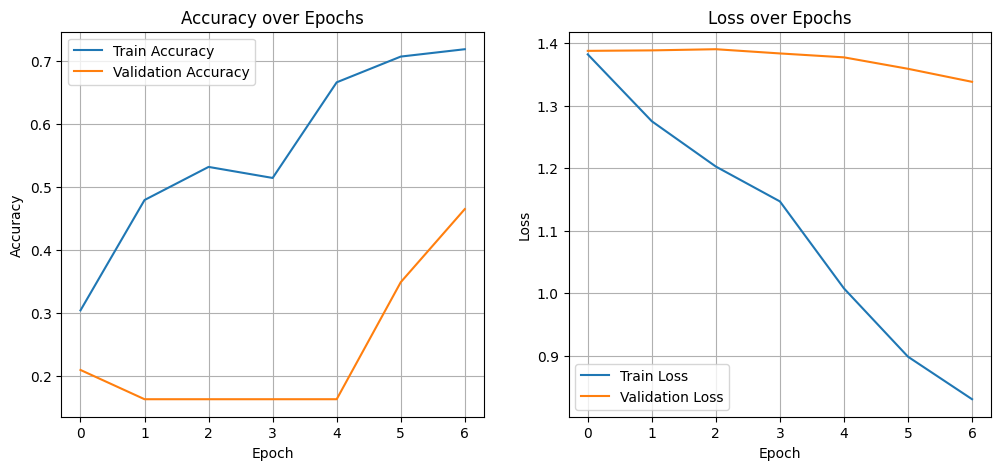

In [53]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()
